<a href="https://colab.research.google.com/github/lo-uis/Team_ChoLab/blob/develop/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch-lightning
###モデル定義で使用####

     |████████████████████████████████| 204kB 9.2MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 829kB 23.1MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=c23afe2babcd64a6fe6b8bafc6f84c89843c9ddab01e8950fe8ff5b7d7abce86
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [0]:
import torch
import torchvision  ###データセット####

In [3]:
torch.__version__, torchvision.__version__

('1.4.0', '0.5.0')

In [0]:
########データ読み込み時の処理#######
#########pytorchではtorch.Tensor型に変換############
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

In [9]:
###########学習用データセットの読み込み#############
train = torchvision.datasets.MNIST(
    root='.',                   #dlするディレクトリ
    train=True,                #学習用データセットを含むかFalseならtestだけ                       
    download=True, 
    transform=transform)     #データセットの読み込み時に行う処理を指定する

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [10]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [11]:
#input size
train[0][0].shape #(ch,h,w)

torch.Size([1, 28, 28])

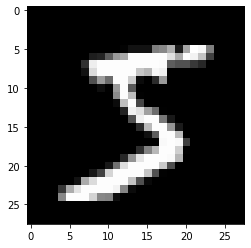

In [13]:
#from (ch,h,w) to (h,w,ch)
import numpy as np
import matplotlib.pyplot as plt

img = np.transpose(train[0][0],(1,2,0))
img.shape
img = img.reshape(img.shape[0],img.shape[1])
plt.imshow(img,cmap="gray")


In [30]:
x =train[0][0]
x.shape


torch.Size([1, 28, 28])

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
conv = nn.Conv2d(1,4,kernel_size=3,stride=1,padding=1)


In [0]:
#from (ch,h,w) to (batchsize,ch,h,w)
x = x.reshape(1,1,28,28)


In [34]:
x =conv(x)
x

tensor([[[[ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705],
          [ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705],
          [ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705],
          ...,
          [ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705],
          [ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705],
          [ 0.0705,  0.0705,  0.0705,  ...,  0.0705,  0.0705,  0.0705]],

         [[-0.0839, -0.0839, -0.0839,  ..., -0.0839, -0.0839, -0.0839],
          [-0.0839, -0.0839, -0.0839,  ..., -0.0839, -0.0839, -0.0839],
          [-0.0839, -0.0839, -0.0839,  ..., -0.0839, -0.0839, -0.0839],
          ...,
          [-0.0839, -0.0839, -0.0839,  ..., -0.0839, -0.0839, -0.0839],
          [-0.0839, -0.0839, -0.0839,  ..., -0.0839, -0.0839, -0.0839],
          [-0.0839, -0.0839, -0.0839,  ..., -0.0839, -0.0839, -0.0839]],

         [[-0.1846, -0.1846, -0.1846,  ..., -0.1846, -0.1846, -0.1846],
          [-0.1846, -0.1846, -

In [0]:
x = F.max_pool2d(x,kernel_size=2,stride=2)

In [0]:
#Flatten
x_shape = x.shape[1] * x.shape[2] * x.shape[3]
x = x.view(-1, x_shape)

In [0]:
#全結合層
fc = nn.Linear(x_shape,10) #784→　10